<a href="https://colab.research.google.com/github/Abhilashg11/Data_science/blob/master/Naive_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


Cloning into 'Data_science'...
remote: Enumerating objects: 594, done.
remote: Counting objects: 100% (594/594), done.
remote: Compressing objects: 100% (246/246), done.
remote: Total 594 (delta 322), reused 546 (delta 285), pack-reused 0
Receiving objects: 100% (594/594), 2.02 MiB | 11.39 MiB/s, done.
Resolving deltas: 100% (322/322), done.


In [6]:
horse = pd.read_csv(r"/content/horse.csv")

In [7]:
target = horse[['outcome']]

In [8]:
features = horse.drop('outcome',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

[Text(0.5416666666666666, 0.9, 'x[21] <= 0.903\ngini = 0.546\nsamples = 224\nvalue = [54, 33, 137]\nclass = lived'),
 Text(0.3125, 0.7, 'x[6] <= 37.191\ngini = 0.638\nsamples = 134\nvalue = [46, 28, 60]\nclass = lived'),
 Text(0.16666666666666666, 0.5, 'x[16] <= 0.217\ngini = 0.613\nsamples = 102\nvalue = [46, 15, 41]\nclass = died'),
 Text(0.08333333333333333, 0.3, 'x[37] <= 0.541\ngini = 0.59\nsamples = 57\nvalue = [17, 9, 31]\nclass = lived'),
 Text(0.041666666666666664, 0.1, 'gini = 0.502\nsamples = 43\nvalue = [11, 4, 28]\nclass = lived'),
 Text(0.125, 0.1, 'gini = 0.643\nsamples = 14\nvalue = [6, 5, 3]\nclass = died'),
 Text(0.25, 0.3, 'x[60] <= 0.305\ngini = 0.518\nsamples = 45\nvalue = [29, 6, 10]\nclass = died'),
 Text(0.20833333333333334, 0.1, 'gini = 0.473\nsamples = 42\nvalue = [29, 5, 8]\nclass = died'),
 Text(0.2916666666666667, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = lived'),
 Text(0.4583333333333333, 0.5, 'x[26] <= 0.655\ngini = 0.482\nsamples = 32\n

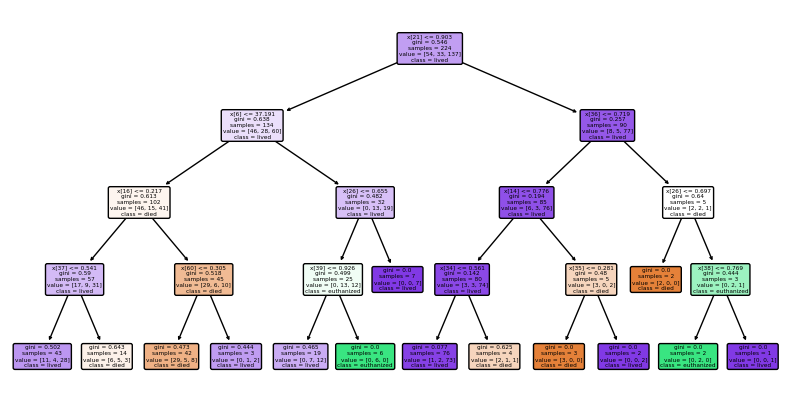

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier


horse.head()
horse.shape
horse.info()
horse.isnull().sum()
target = horse[['outcome']]
target.value_counts()
features = horse.drop('outcome',axis=1)
features.shape

features = pd.get_dummies(features)

features.head()

x_train,x_test,y_train,y_test = train_test_split(features,target,train_size=0.75,random_state=70)
x_train
x_train.isnull().sum()
simple_impute = SimpleImputer(missing_values=np.nan,strategy='mean')
x_train = simple_impute.fit_transform(x_train)
x_test = simple_impute.fit_transform(x_test)
x_train
y_test.isnull().sum()
x_train_df = pd.DataFrame(x_train)
x_train_df.isnull().sum()
x_train_df
x_test
a = pd.DataFrame(x_test)
a

dec_tree = DecisionTreeClassifier(criterion = "gini", splitter = "random", max_depth = 4)
dec_tree.fit(x_train,y_train)
y_pred = dec_tree.predict(x_test)
y_pred
accuracy_score(y_test,y_pred)
confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
pd.DataFrame(y_pred).value_counts()
params = {'criterion' :["entropy",'gini'], 'splitter': ["random",'best'], 'max_depth' :[1,2,3,4,5,10,8,9]}
grid = GridSearchCV(dec_tree,params)
grid.fit(x_train,y_train)
grid.best_params_
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dec_tree,filled=True,rounded=True,class_names=horse.outcome,feature_names=horse.get(features))



In [10]:
from sklearn.naive_bayes import BernoulliNB

In [13]:
naive_bayes = BernoulliNB()

In [14]:
naive_bayes.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [15]:
pred = naive_bayes.predict(x_test)

In [16]:
accuracy_score(y_test,pred)

0.6

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        died       0.44      0.65      0.53        23
  euthanized       0.40      0.18      0.25        11
       lived       0.78      0.68      0.73        41

    accuracy                           0.60        75
   macro avg       0.54      0.51      0.50        75
weighted avg       0.62      0.60      0.60        75

